In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [84]:
mnist_data = fetch_openml('mnist_784')
mnist_data.data.shape

(70000, 784)

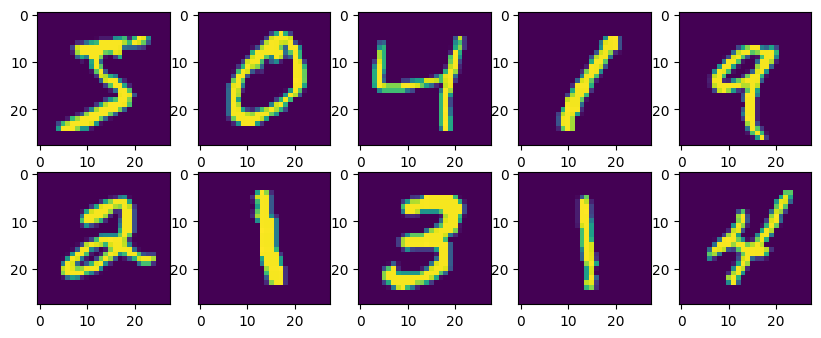

In [85]:
plt.figure(figsize=(10, 10))
for index in range(10):
  plt.subplot(5, 5, index+1)
  plt.imshow(mnist_data.data.to_numpy()[index].reshape(28, 28))

In [86]:
X = mnist_data.data
y = mnist_data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/7, random_state=42
)

test_image = X_test.copy()

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
pca = PCA(.97)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.n_components_)

165


In [102]:
model_log = LogisticRegression()

model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

accuracy_score(y_test, y_pred)

0.9224